Installing all required packages

In [248]:
!pip install pandas numpy scikit-learn matplotlib seaborn lazypredict "dask[dataframe]"

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns

from lazypredict.Supervised import LazyRegressor

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [250]:
df = pd.read_csv('wearable_tech_sleep_quality_1.csv')
df.head()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.93,37.20,1.32,4.64,1.00,107.62,2.77,0.66,7.93
1,67.23,36.96,1.86,6.21,1.00,104.66,3.74,0.14,6.99
2,82.95,36.53,1.21,6.88,10.00,0.00,3.12,0.64,7.66
3,100.46,36.18,1.69,10.33,1.00,116.99,3.90,0.45,9.43
4,65.32,36.85,0.11,8.33,1.00,223.28,4.57,0.64,10.56


In [251]:
df.isna().sum()

,0
Heart_Rate_Variability,0
Body_Temperature,0
Movement_During_Sleep,0
Sleep_Duration_Hours,0
Sleep_Quality_Score,0
Caffeine_Intake_mg,0
Stress_Level,0
Bedtime_Consistency,0
Light_Exposure_hours,0


<Axes: >

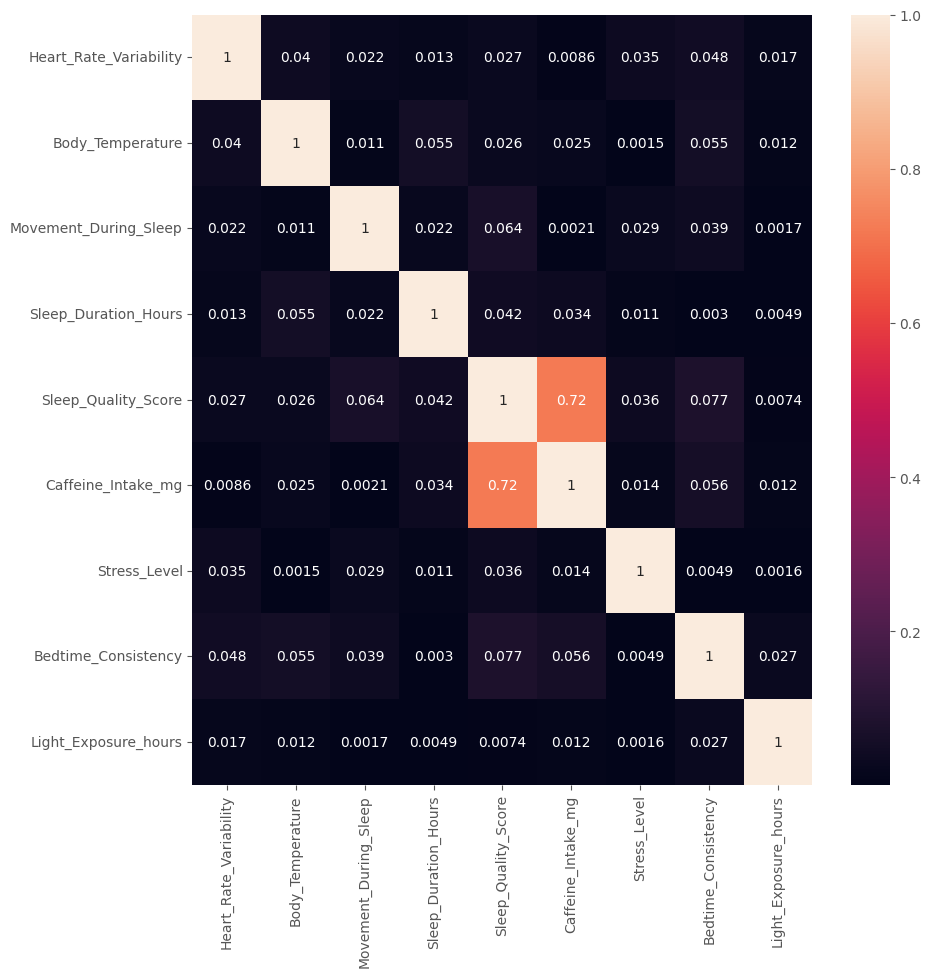

In [252]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(), annot=True)

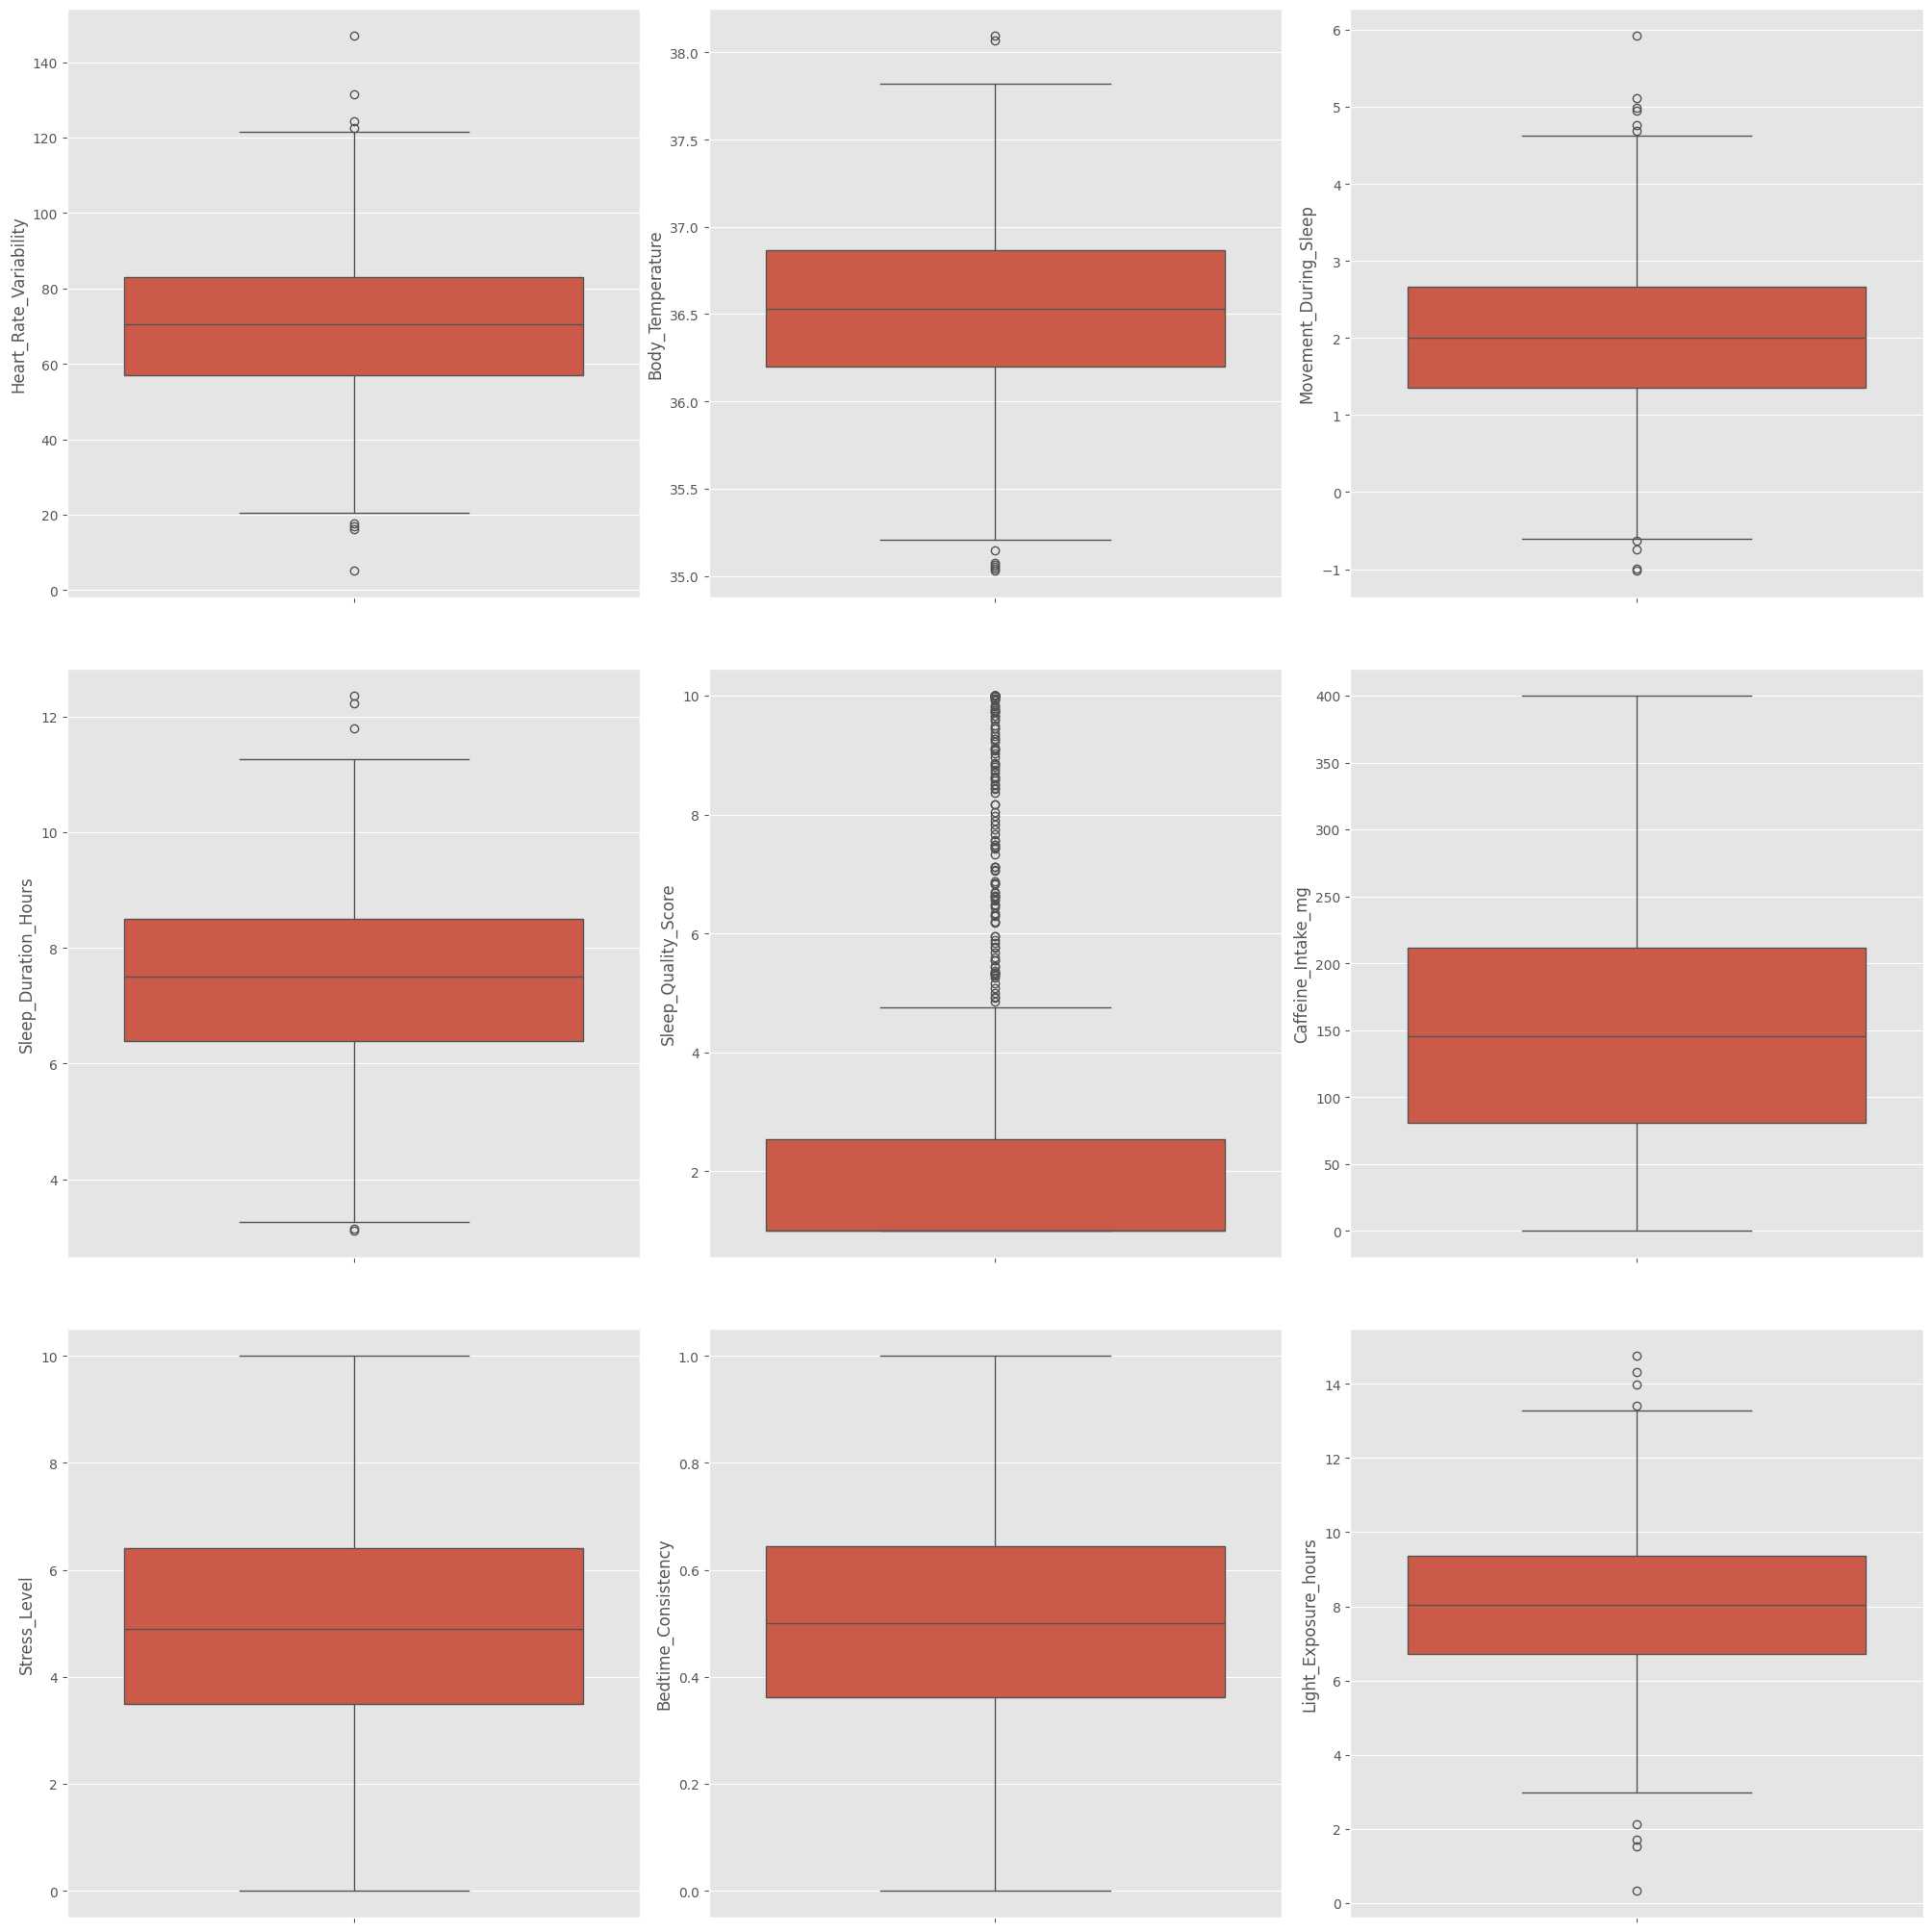

In [253]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
axs = axs.flatten()
for i, (k,v) in enumerate(df.items()):
    sns.boxplot(y=k, data=df, ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

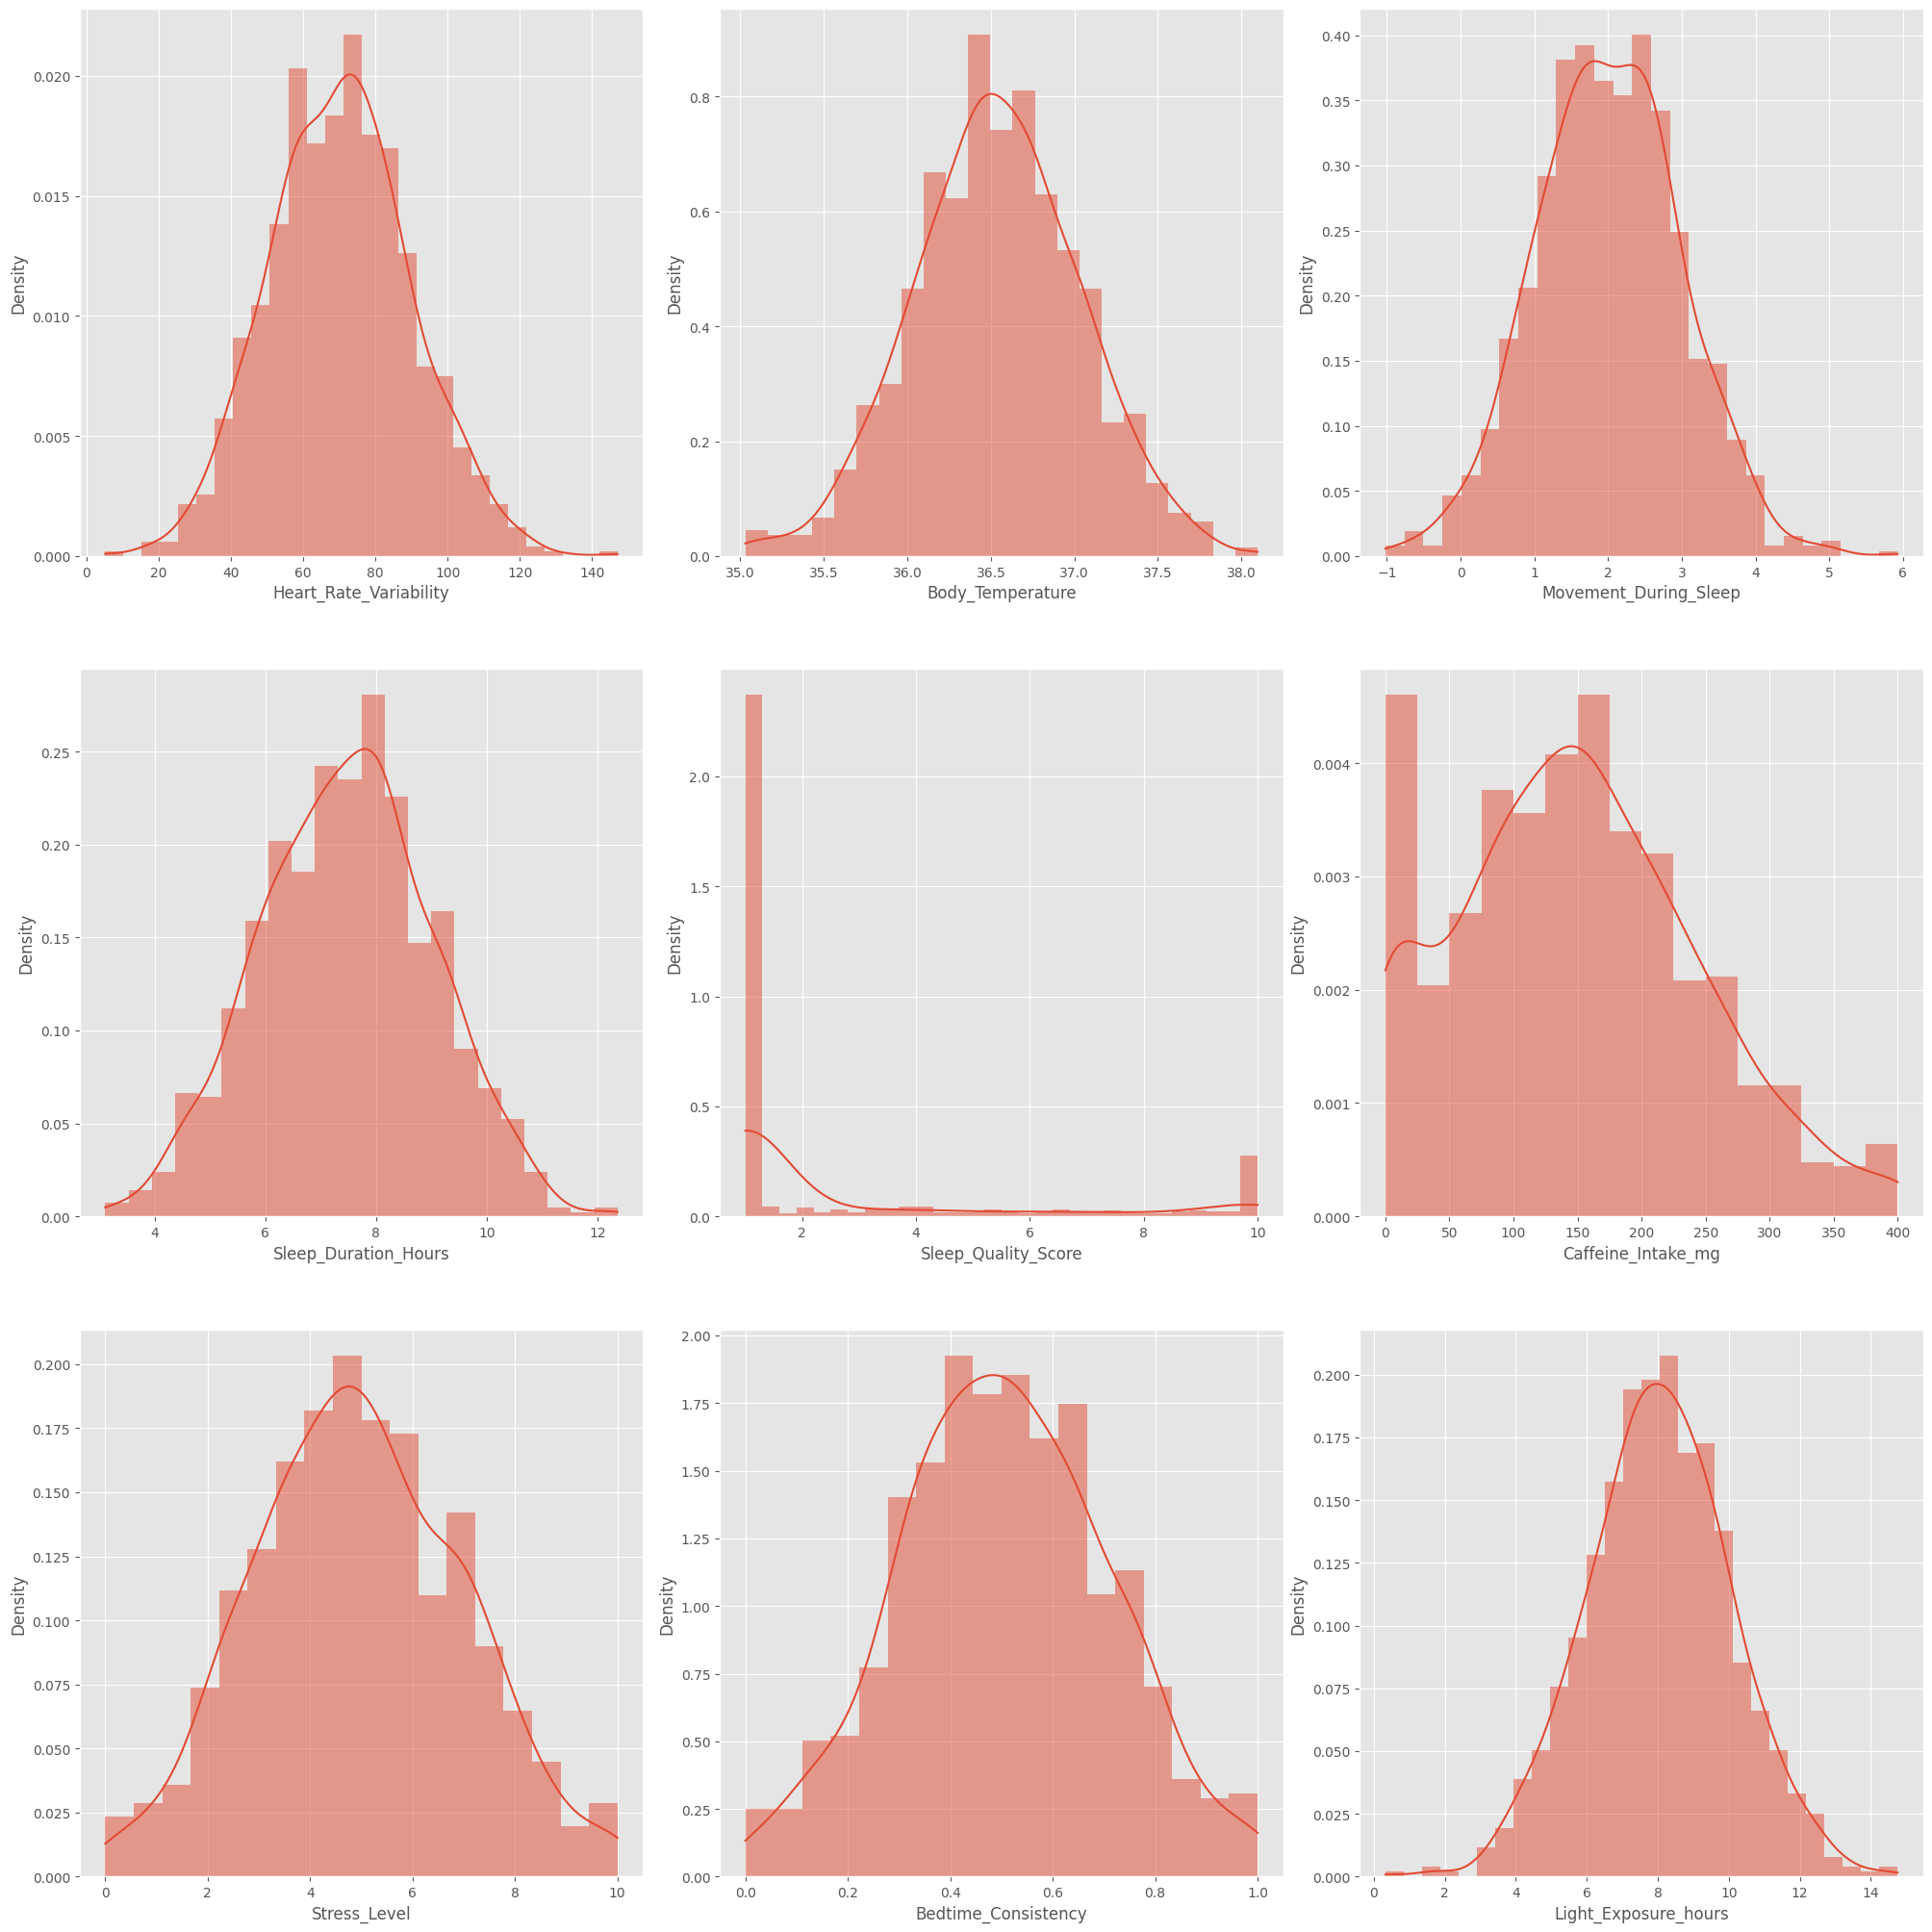

In [254]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
axs = axs.flatten()
for i, (k,v) in enumerate(df.items()):
    sns.histplot(v, ax=axs[i], kde=True, stat="density", linewidth=0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [255]:
random_state = 42

X = df[['Caffeine_Intake_mg']]
y = df["Sleep_Quality_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

def compare_models(X_train, X_test, y_train, y_test):
  clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
  models, predictions = clf.fit(X_train, X_test, y_train, y_test)
  return models

compare_models(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:02<00:00, 16.09it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Start training from score 2.600398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.99,0.99,0.36,0.09
GradientBoostingRegressor,0.99,0.99,0.36,0.19
HistGradientBoostingRegressor,0.99,0.99,0.36,0.14
AdaBoostRegressor,0.98,0.98,0.36,0.05
KNeighborsRegressor,0.98,0.98,0.36,0.01
SVR,0.98,0.98,0.37,0.04
NuSVR,0.98,0.98,0.37,0.15
LGBMRegressor,0.98,0.98,0.37,0.10
RandomForestRegressor,0.98,0.98,0.38,0.21


In [256]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
score = gbr.score(X_test, y_test)
print(f"Accuracy: {score}")

y_pred = gbr.predict(X_test)

Accuracy: 0.9851676235734279


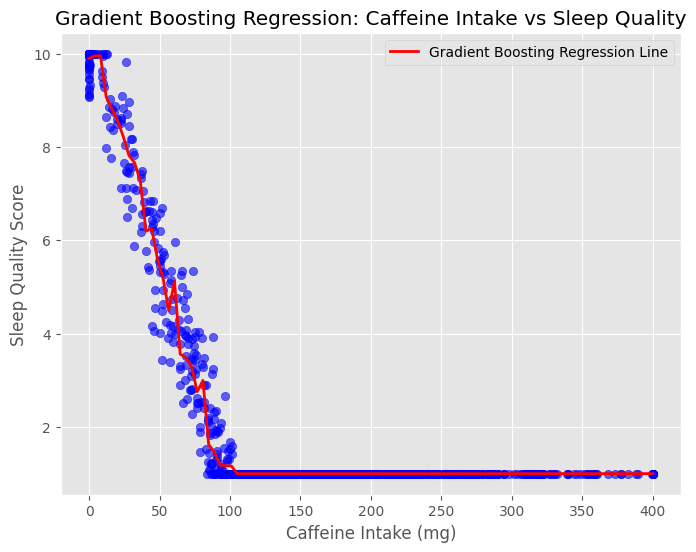

In [257]:
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = gbr.predict(x_range)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6)
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Gradient Boosting Regression Line')
plt.title('Gradient Boosting Regression: Caffeine Intake vs Sleep Quality')
plt.xlabel('Caffeine Intake (mg)')
plt.ylabel('Sleep Quality Score')
plt.grid(True)
plt.legend()
plt.show()

In [258]:
new_caffeine_values = np.array([[50], [100], [200], [300]])
predicted_sleep_quality = gbr.predict(new_caffeine_values)
for intake, prediction in zip(new_caffeine_values.flatten(), predicted_sleep_quality):
    print(f"Caffeine Intake: {intake} mg -> Predicted Sleep Quality Score: {prediction:.2f}")

Caffeine Intake: 50 mg -> Predicted Sleep Quality Score: 6.11
Caffeine Intake: 100 mg -> Predicted Sleep Quality Score: 1.17
Caffeine Intake: 200 mg -> Predicted Sleep Quality Score: 1.00
Caffeine Intake: 300 mg -> Predicted Sleep Quality Score: 1.00


In [259]:
desired_quality = 7
caffeine_safe_limit = None

for intake in range(0, 401, 5):
    predicted_score = gbr.predict(np.array([[intake]]))[0]
    if predicted_score >= desired_quality:
        caffeine_safe_limit = intake
    else:
        break

if caffeine_safe_limit:
    print(f"To maintain a sleep quality score of {desired_quality} or higher, limit caffeine intake to {caffeine_safe_limit} mg or less.")
else:
    print("No safe limit found; caffeine intake may always affect sleep quality.")

To maintain a sleep quality score of 7 or higher, limit caffeine intake to 35 mg or less.
